# Лабораторная работа 2
---
### *Упражнение 2.2*

> Пилообразный сигнал линейно нарастает от -1 до 1, а затем резко падает до -1 и повторяется.
>
> Напишите класс `SawtoothSignal`, расширяющий `signal` и предоставляющий `evaluate` для оценки пилообразного сигнала.
>
> Вычислите спектр пилорбразного сигнала. Как соотносится его гармоническая структура с треугольным и прямоугольным сигналами?

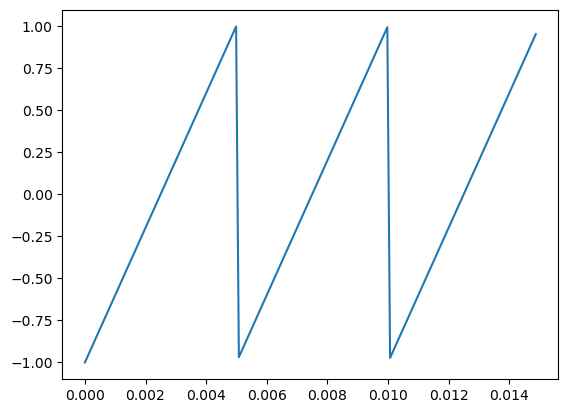

In [72]:
from thinkdsp import *
import numpy as np

class SawtoothSignal(Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / (np.pi * 2)
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

signal_saw = SawtoothSignal(200)
signal_saw.plot()

Спектр пилообразного сигнала

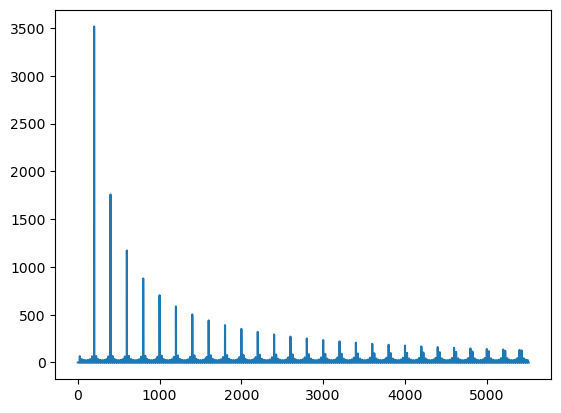

In [57]:
wave_saw = signal_saw.make_wave()
spectrum_saw = wave_saw.make_spectrum()
spectrum_saw.plot()

Сравнение спектров пилообразного и треугольного сигналов. Амплитуда гармоник треугольного сигнала спадает пропорционально квадрату частоты $ 1 \over {f^2} $, когда как у пилообразного $ 1 \over f$. Также у треугольного сигнала есть только нечетные пики

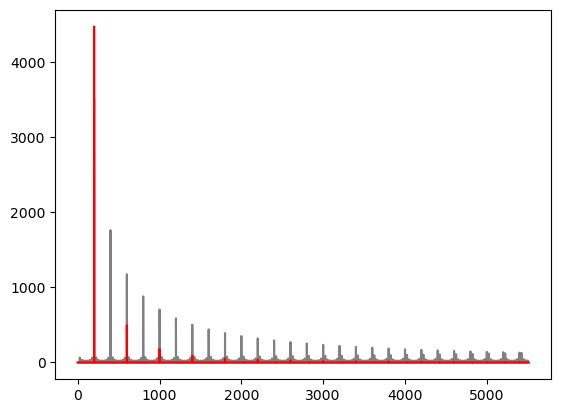

In [58]:
sig_tri = TriangleSignal(200)
wave_tri = sig_tri.make_wave()
spectrum_tri = wave_tri.make_spectrum()
spectrum_saw.plot(color='gray')
spectrum_tri.plot(color='red')

Сравнение прямоугольного(красный) и пилообразного (серый) сигналов. Амплитуды гармоник спадают одинаково - пропорционально частоте. Но прямоугольный сигнал имеет только нечетные гармоники, когда пилообразный и четные и нечетные. Также для наглядности пришлось ослабить прямоугольный сигнал, чтобы совпадали максимальные амплитуды гармоник

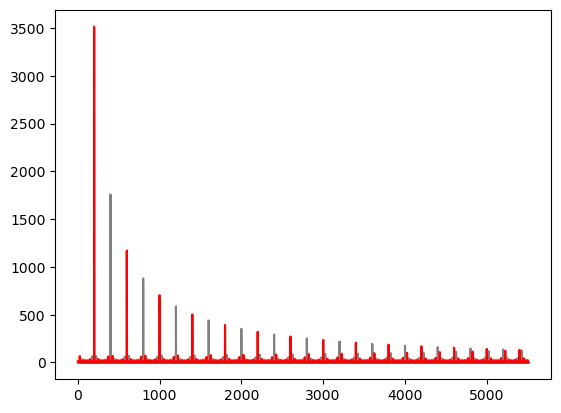

In [59]:
spectrum_saw.plot(color="gray")
SquareSignal(200, amp=0.5).make_wave().make_spectrum().plot(color="red")

### *Упражнение 2.3*

> Создайте прямоугольный сигнал 1100 Гц и вычислите `wave` с выборками 10000 кадров в секунду. Постройте спектр и убедитесь, что большинство гармоник завернуты из-за биений. Слышны ли последствия этого при проигрывании?

[(6367.182534102138, 1100.0),
 (2125.0234754609446, 3300.0),
 (1278.179301804898, 4500.0),
 (916.3945635352013, 2300.0),
 (716.3133230172564, 100.0),
 (589.7524848583664, 2100.0),
 (502.79979422568437, 4300.0),
 (439.6334835436984, 3500.0),
 (391.8810380915291, 1300.0),
 (354.6987875059537, 900.0)]

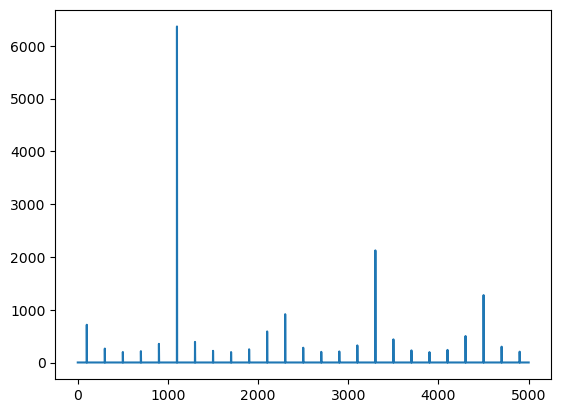

In [60]:
wave_sq = SquareSignal(1100).make_wave(framerate=10000)
wave_sq.make_spectrum().plot()
wave_sq.make_spectrum().peaks()[:10]

Выведя список первых 10 пиков с самыми большими амплитуд. Первые две находятся на своих местах, а дальше уже наблюдаем заворот. Третья гармоника должна быть 5500 Гц, а сейчас 4500 Гц (10000 - 5500 = 4500). Далее 10000 - 7700 = 2300 и т. д.

Для более наглядной иллюстрации алиасинга можем вывести спектр волны с частотой 8900 Гц и получим одинаковый результат

[(6367.182534102138, 1100.0),
 (2125.0234754609446, 3300.0),
 (1278.179301804898, 4500.0),
 (916.3945635352013, 2300.0),
 (716.3133230172564, 100.0),
 (589.7524848583664, 2100.0),
 (502.79979422568437, 4300.0),
 (439.6334835436984, 3500.0),
 (391.8810380915291, 1300.0),
 (354.6987875059537, 900.0)]

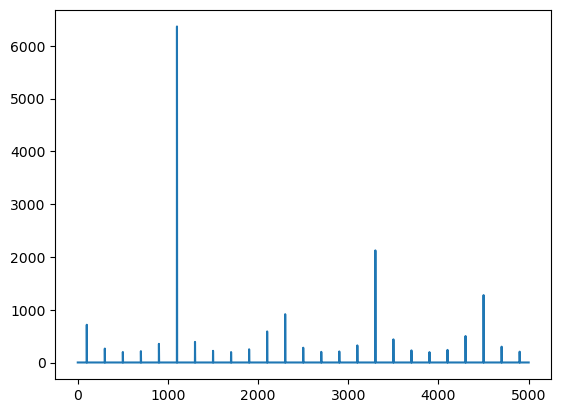

In [61]:
wave_sq = SquareSignal(1100).make_wave(framerate=10000)
wave_sq.make_spectrum().plot()
wave_sq.make_spectrum().peaks()[:10]

### *Упражнение 2.4*

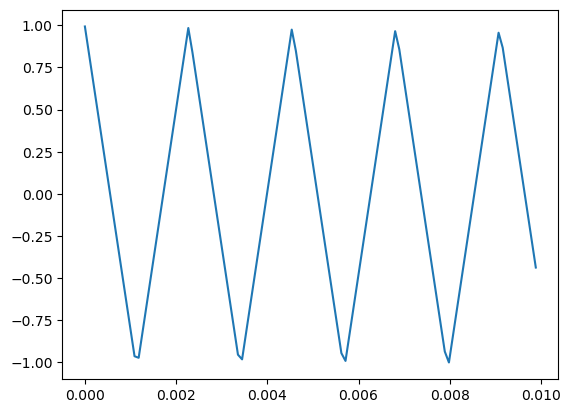

In [62]:
triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()

Первый элемент спектра - комплексное число очень близкое к нулю

In [63]:
spectrum = triangle.make_spectrum()
print(spectrum.fs[:5])
spectrum.hs[0]

[  0.         100.22727273 200.45454545 300.68181818 400.90909091]


(1.0436096431476471e-14+0j)

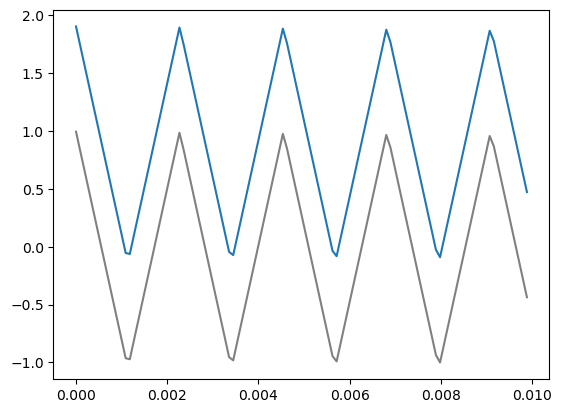

In [64]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()

При изменении компоненты с 0 частотой мы изменяем вертикальное положение волны

### *Упражнение 2.5*

> Напишите функцию, принимающую `Spectrum` как параметр и изменяющую его делением каждого элемента `hs` на соответствующую частоту `fs` 

> Проверьте эту функцию, используя прямоугольный, треугольный или пилообразный сигналы

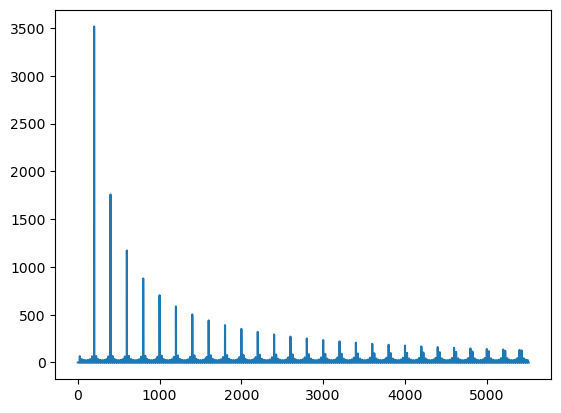

In [65]:
def spectrum_operation(spectrum):
    spectrum.hs[0] = 0
    spectrum.hs[1:] /= spectrum.fs[1:]

spectrum_saw.plot()

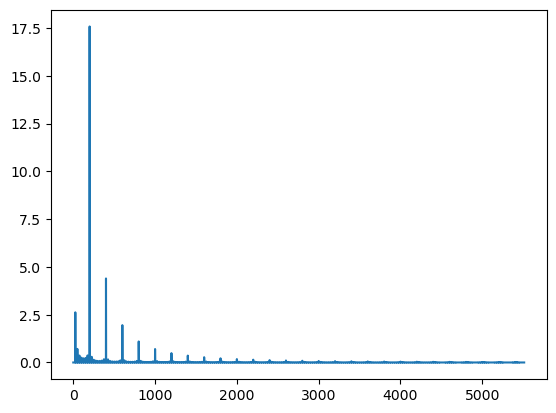

In [66]:
spectrum_operation(spectrum_saw)
spectrum_saw.plot()

По полученному спектру можем заметить, что сильно уменьшились все амплитуды компонент. Также амплитуды компонент высоких частот сильно уменьшились и наша функция работает почти как фильтр высоких частот

Звук после обработки:

In [67]:
new_wave = spectrum_saw.make_wave()
new_wave.make_audio()

Звук до обработки:

In [69]:
wave_saw.make_audio()

### *Упражнение 2.6*

> У треугольных и прямоугольных сигналов есть только нечетные гармоники; в пилообразном сигнале есть и четные, и нечетные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально $1 / f$; гармоники треугольных сигналов - пропорционально $1 / f^2$. Можно ли найти сигнал, состоящий из четных и нечетных гармоник, спадающий пропорционально $1 / f^2$?


Сначала возьмем пилообразный сигнал, так как он уже содержит все необходимые гармоники. Затем воспользуемся написанной в предыдущем упражнении функцией. Эта функция делит гармоники на соответствующую им частоту. 

Если до применения функции гармоники уменьшались пропорционально $1 \over f$, то ,поделив каждую гармонику на частоту, они начнут уменьшаться пропорционально $1 \over {f^2}$

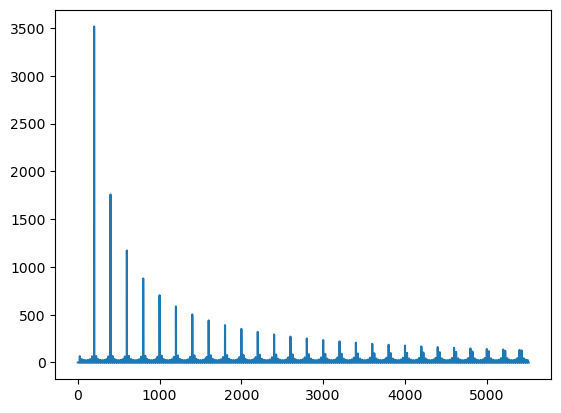

In [74]:
new_sawtooth_spectrum = SawtoothSignal(200).make_wave().make_spectrum()
new_sawtooth_spectrum.plot()

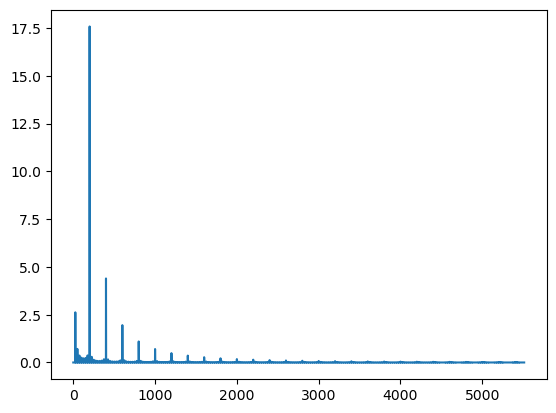

In [75]:
spectrum_operation(new_sawtooth_spectrum)
new_sawtooth_spectrum.plot()

Волна этого сигнала похожа на наклоненную синусоиду

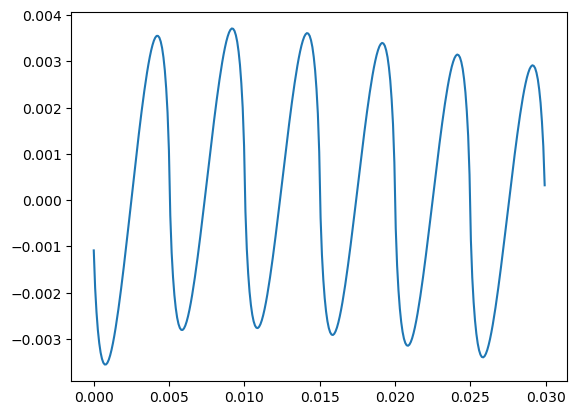

In [79]:
new_sawtooth_spectrum.make_wave().segment(duration=0.03).plot()